In [1]:
import pandas as pd

df = pd.read_csv('retail_case_data.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [2]:
df['Age'] = 2025 - df['Year_Birth']

In [3]:
bins = [20, 30, 40, 50, 60, 70, 80, 100]
labels = ['21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_response = df.groupby('Age_Group')['Response'].mean().reset_index()

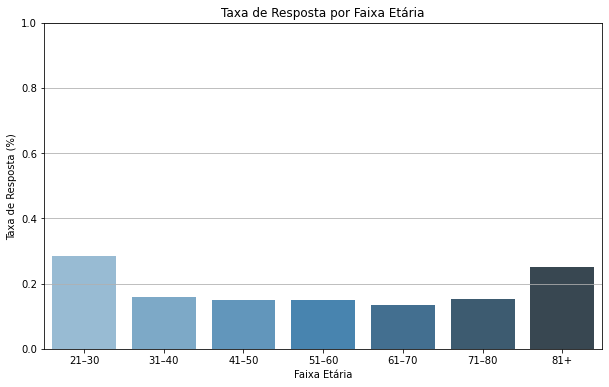

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=age_response, x='Age_Group', y='Response', palette='Blues_d')
plt.title('Taxa de Resposta por Faixa Etária')
plt.ylabel('Taxa de Resposta (%)')
plt.xlabel('Faixa Etária')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [8]:
age_response_counts = df.groupby(['Age_Group', 'Response']).size().unstack().fillna(0)

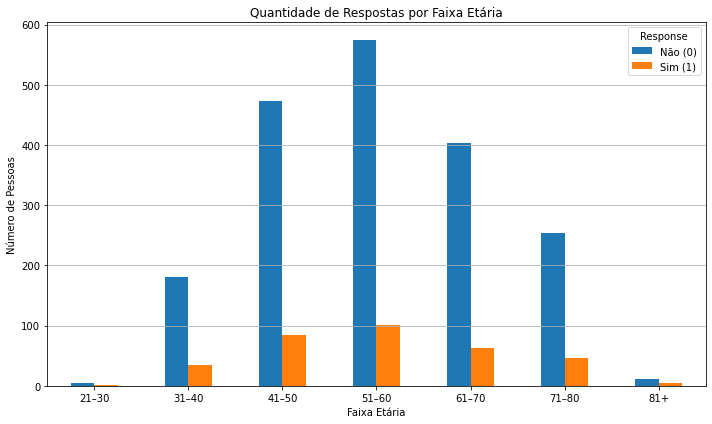

In [9]:
age_response_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Quantidade de Respostas por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')
plt.legend(title='Response', labels=['Não (0)', 'Sim (1)'])
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [10]:
# Contagem total por faixa etária
total_por_faixa = df.groupby('Age_Group').size()

# Contagem de respostas = 1 por faixa etária
respostas_positivas = df[df['Response'] == 1].groupby('Age_Group').size()

# Cálculo da taxa
taxa_aceitacao = (respostas_positivas / total_por_faixa).fillna(0).reset_index()
taxa_aceitacao.columns = ['Age_Group', 'Acceptance_Rate']

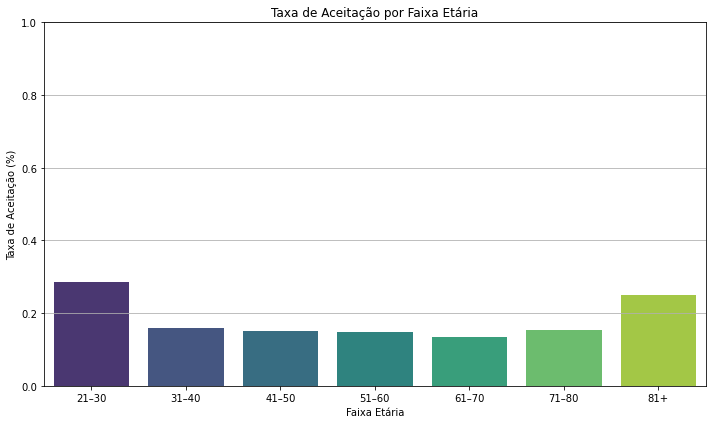

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age_Group', y='Acceptance_Rate', data=taxa_aceitacao, palette='viridis')
plt.title('Taxa de Aceitação por Faixa Etária')
plt.ylabel('Taxa de Aceitação (%)')
plt.xlabel('Faixa Etária')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1. Gráfico 1: Quantidade de Respostas por Faixa Etária
Observações:
A maioria dos clientes está concentrada entre 31–40, 41–50 e 51–60 anos.

A quantidade absoluta de respostas positivas (Sim - laranja) é mais alta nas faixas 41–50 e 51–60.

No entanto, essas mesmas faixas também têm uma grande quantidade de respostas negativas (Não - azul), o que indica que o volume alto pode estar relacionado à base de clientes maior nessa faixa, e não necessariamente a uma taxa de conversão melhor.

2. Gráfico 2: Taxa de Aceitação (%) por Faixa Etária
Observações:
A maior taxa de aceitação proporcional está na faixa etária 21–30 anos, superando as demais faixas com margem considerável.

As faixas de 31 até 70 anos apresentam taxas muito próximas entre si, na casa dos 15–18%.

A faixa 81+ anos, apesar de menor em volume, também mostra uma taxa de aceitação levemente maior do que a média.

In [12]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [13]:
# Total de clientes por educação
total_educ = df.groupby('Education').size()

# Total de respostas positivas por educação
respostas_educ = df[df['Response'] == 1].groupby('Education').size()

# Taxa de aceitação
taxa_educ = (respostas_educ / total_educ).fillna(0).reset_index()
taxa_educ.columns = ['Education', 'Acceptance_Rate']

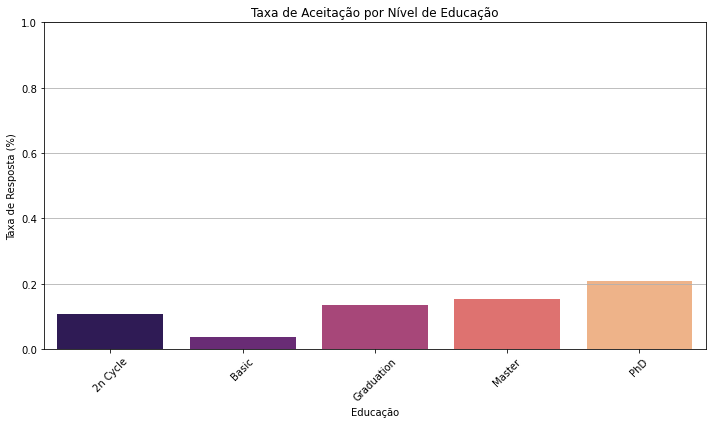

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(data=taxa_educ, x='Education', y='Acceptance_Rate', palette='magma')
plt.title('Taxa de Aceitação por Nível de Educação')
plt.ylabel('Taxa de Resposta (%)')
plt.xlabel('Educação')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

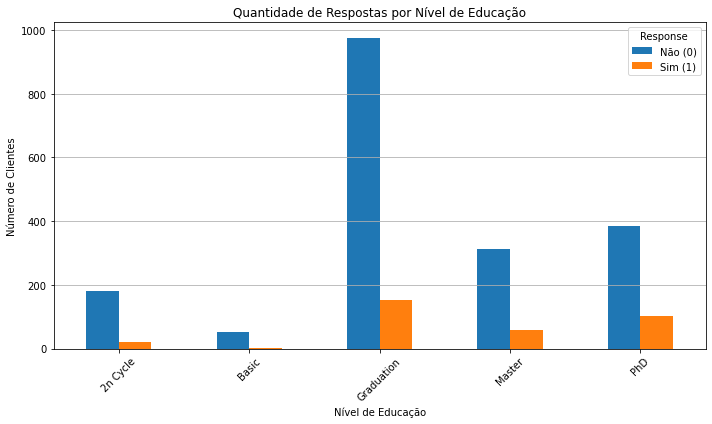

In [15]:
# Tabela de contagem
educ_response_counts = df.groupby(['Education', 'Response']).size().unstack().fillna(0)

# Gráfico de barras agrupadas
educ_response_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Quantidade de Respostas por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Número de Clientes')
plt.legend(title='Response', labels=['Não (0)', 'Sim (1)'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [16]:
df['Income'].isnull().sum()
df = df.dropna(subset=['Income'])  # ou preencher com df['Income'].median()

In [17]:
# Criação de faixas (ajuste conforme sua distribuição de dados)
bins = [0, 30000, 60000, 90000, 120000, 150000]
labels = ['0–30k', '30k–60k', '60k–90k', '90k–120k', '120k+']
df['Income_Group'] = pd.cut(df['Income'], bins=bins, labels=labels)


In [18]:
total_income = df.groupby('Income_Group').size()
respostas_income = df[df['Response'] == 1].groupby('Income_Group').size()
taxa_income = (respostas_income / total_income).fillna(0).reset_index()
taxa_income.columns = ['Income_Group', 'Acceptance_Rate']

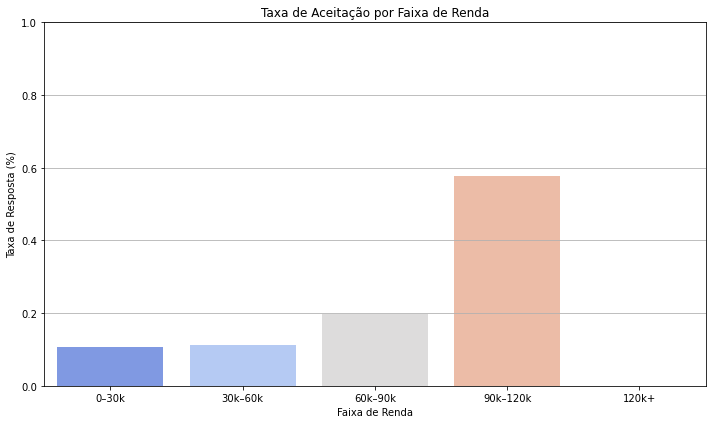

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=taxa_income, x='Income_Group', y='Acceptance_Rate', palette='coolwarm')
plt.title('Taxa de Aceitação por Faixa de Renda')
plt.ylabel('Taxa de Resposta (%)')
plt.xlabel('Faixa de Renda')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

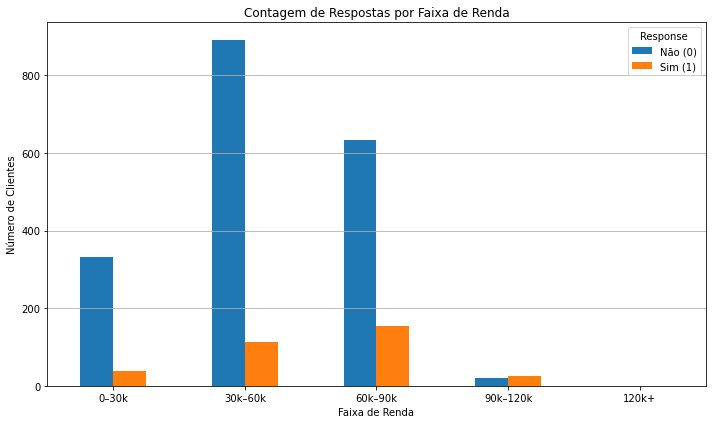

In [20]:
income_response_counts = df.groupby(['Income_Group', 'Response']).size().unstack().fillna(0)

income_response_counts.plot(kind='bar', figsize=(10,6))
plt.title('Contagem de Respostas por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Número de Clientes')
plt.legend(title='Response', labels=['Não (0)', 'Sim (1)'])
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [21]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.columns.tolist()

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age']

In [22]:
df[numericas.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


In [38]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [39]:
for col in categorical_features:
    X[col] = X[col].astype(str).fillna('Unknown')

In [40]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X, y, cat_features=categorical_features)

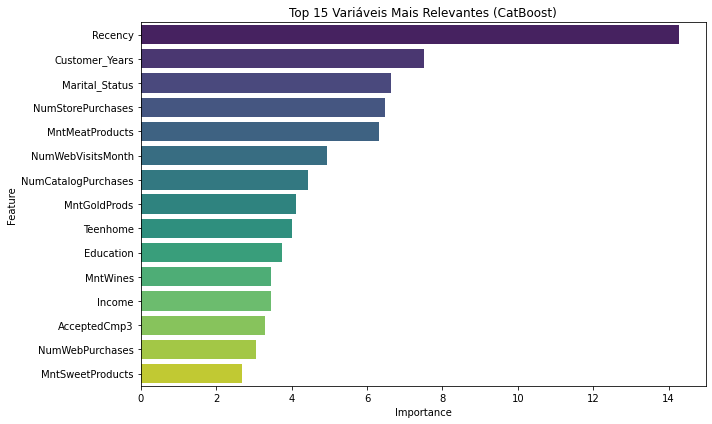

In [41]:
# Obter a importância das features
importances = model.get_feature_importance()
features = X.columns

importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizar as top 15
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Variáveis Mais Relevantes (CatBoost)')
plt.tight_layout()
plt.show()

In [46]:
# Selecionar variáveis numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])

# Calcular correlação com a variável alvo
correlation_with_response = numericas.corr()['Response'].drop('Response')  # Remove a correlação de Response com ela mesma


In [47]:
correlation_df = correlation_with_response.sort_values(ascending=False).reset_index()
correlation_df.columns = ['Feature', 'Correlation']

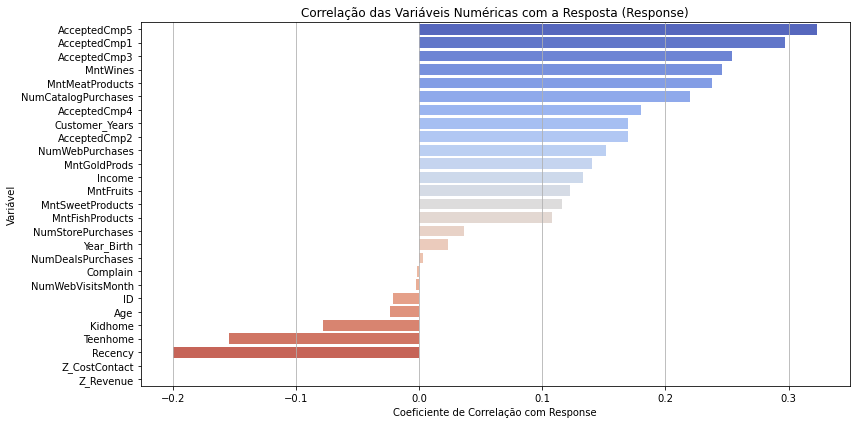

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(data=correlation_df, x='Correlation', y='Feature', palette='coolwarm')
plt.title('Correlação das Variáveis Numéricas com a Resposta (Response)')
plt.xlabel('Coeficiente de Correlação com Response')
plt.ylabel('Variável')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [49]:
cor_target = correlation_matrix['Response'].sort_values(ascending=False)

# Mostrar as top correlações (positivas ou negativas)
print(cor_target)

Response               1.000000
AcceptedCmp5           0.323374
AcceptedCmp1           0.297345
AcceptedCmp3           0.254005
MntWines               0.246299
MntMeatProducts        0.237746
NumCatalogPurchases    0.219914
AcceptedCmp4           0.180205
Customer_Years         0.169998
AcceptedCmp2           0.169294
NumWebPurchases        0.151431
MntGoldProds           0.140332
Income                 0.133047
MntFruits              0.122443
MntSweetProducts       0.116170
MntFishProducts        0.108145
NumStorePurchases      0.036241
Year_Birth             0.023692
NumDealsPurchases      0.003451
Complain              -0.002029
NumWebVisitsMonth     -0.002209
ID                    -0.021491
Age                   -0.023692
Kidhome               -0.077909
Teenhome              -0.153901
Recency               -0.199766
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Response, dtype: float64


### 1. Histórico de campanhas aceitas (AcceptedCmp1 a AcceptedCmp5, Response)

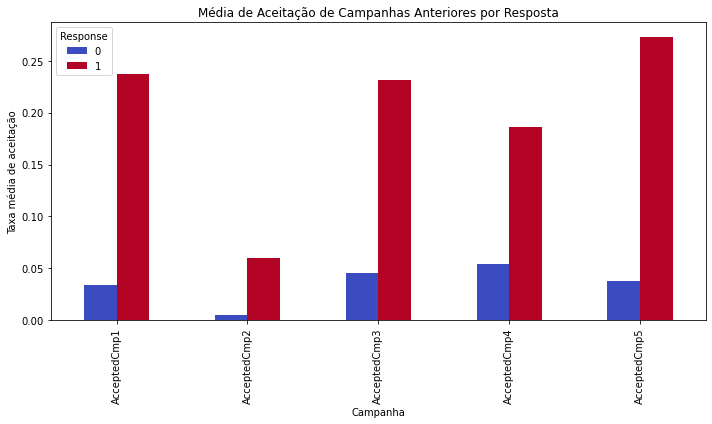

In [51]:
cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

df_cmp = df[cmp_cols + ['Response']].groupby('Response').mean().T

df_cmp.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title('Média de Aceitação de Campanhas Anteriores por Resposta')
plt.ylabel('Taxa média de aceitação')
plt.xlabel('Campanha')
plt.tight_layout()
plt.show()


### 2. Consumo de produtos premium (MntWines, MntMeatProducts, MntGoldProds, MntFishProducts, MntFruits)

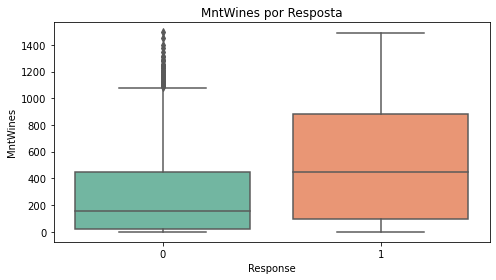

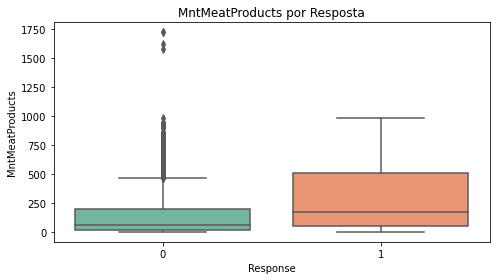

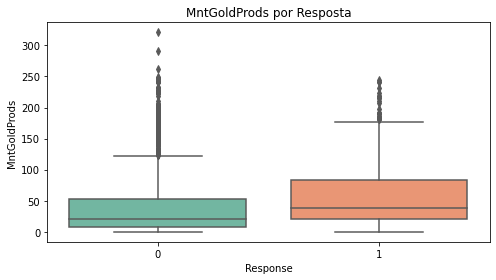

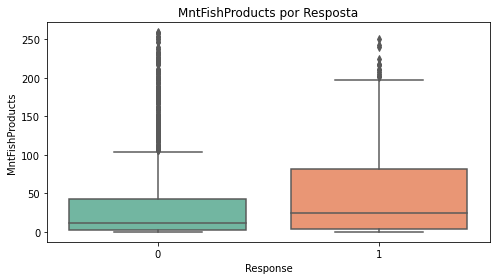

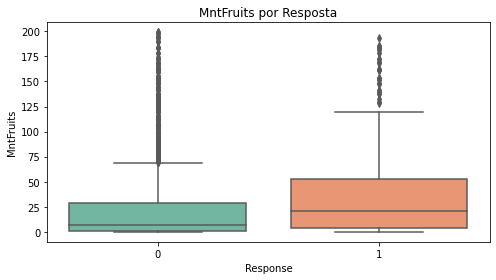

In [52]:
premium_products = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntFruits']

for col in premium_products:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='Response', y=col, data=df, palette='Set2')
    plt.title(f'{col} por Resposta')
    plt.tight_layout()
    plt.show()


###  3. Canais preferidos: NumWebPurchases, NumCatalogPurchases, NumStorePurchases

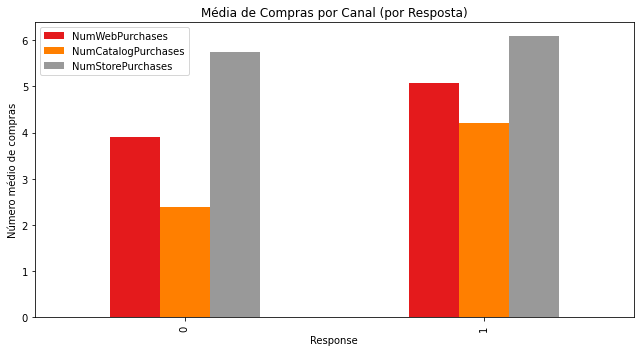

In [53]:
df.groupby('Response')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean().plot(
    kind='bar', figsize=(9, 5), colormap='Set1')
plt.title('Média de Compras por Canal (por Resposta)')
plt.ylabel('Número médio de compras')
plt.tight_layout()
plt.show()

### 4. Renda e tempo como cliente: Income, Customer_Years

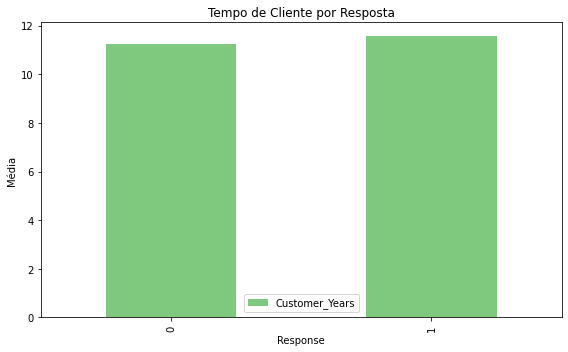

In [57]:
df.groupby('Response')[['Customer_Years']].mean().plot(kind='bar', figsize=(8, 5), colormap='Accent')
plt.title('Tempo de Cliente por Resposta')
plt.ylabel('Média')
plt.tight_layout()
plt.show()

In [58]:
# Dados da campanha
total_customers = 2240            # Total de clientes abordados
total_cost = 6720                 # Custo total da campanha 
total_revenue = 3674             # Receita gerada na campanha piloto
response_rate = 0.15             # Taxa de resposta observada (15%)

# Receita média por cliente que respondeu
converted_customers = total_customers * response_rate
revenue_per_response = total_revenue / converted_customers

# Calcular taxa mínima de resposta para break-even 
break_even_response_rate = total_cost / (total_customers * revenue_per_response)

print(f"Receita média por cliente convertido: {revenue_per_response:.2f} MU")
print(f"Taxa mínima de resposta para break-even: {break_even_response_rate:.4f} ({break_even_response_rate*100:.2f}%)")


Receita média por cliente convertido: 10.93 MU
Taxa mínima de resposta para break-even: 0.2744 (27.44%)


In [61]:
selected_features = [
    'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp3', 'MntWines', 'MntMeatProducts',
    'NumCatalogPurchases', 'AcceptedCmp4', 'AcceptedCmp2',
    'NumWebPurchases', 'MntGoldProds', 'Income', 'MntFruits', 'Age'
]

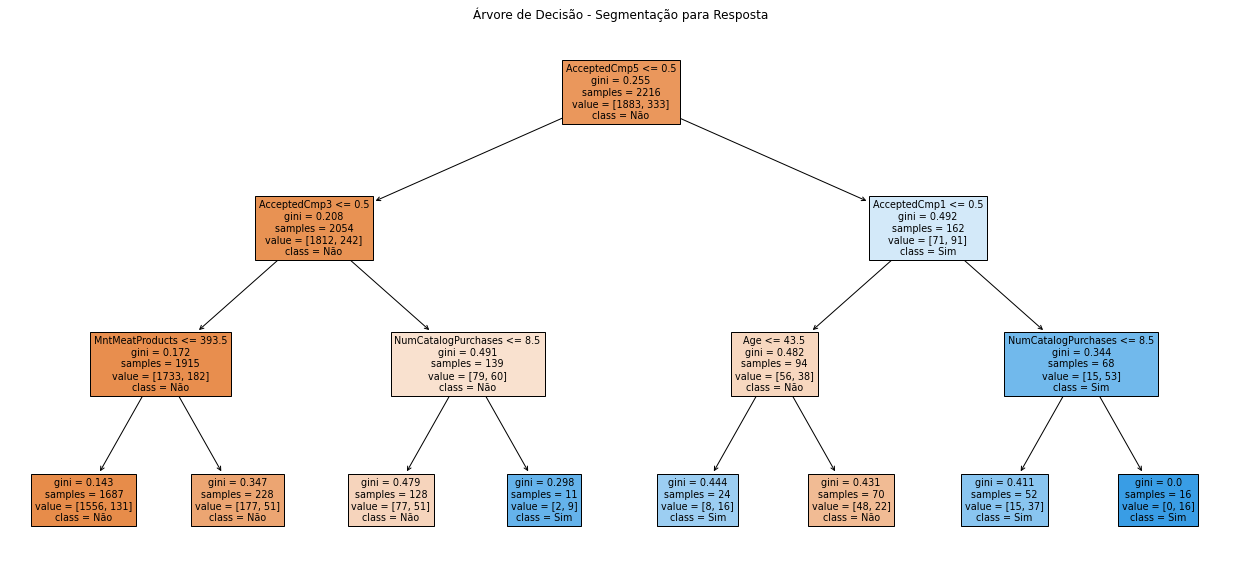

In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Features e target
X = df[selected_features]
y = df['Response']

# Treinar modelo simples
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X, y)

# Visualizar
plt.figure(figsize=(22, 10))
plot_tree(tree_model, feature_names=selected_features, class_names=["Não", "Sim"], filled=True)
plt.title("Árvore de Decisão - Segmentação para Resposta")
plt.show()

In [74]:
segmento_ideal = df[
    (df['AcceptedCmp1'] == 1) &
    (df['NumCatalogPurchases'] > 1) &
    (df['Income'] > 60000) &
    (df['Age'] > 21) &
    (df['Education'].isin(['2n Cycle','Graduation', 'Master', 'PhD']))
]

# Métricas do segmento
n_ideal = segmento_ideal.shape[0]
taxa_resposta = segmento_ideal['Response'].mean()

print(f"Nº de clientes no segmento ideal: {n_ideal}")
print(f"Taxa de resposta no segmento: {taxa_resposta:.2%}")


Nº de clientes no segmento ideal: 135
Taxa de resposta no segmento: 54.81%


In [75]:
custo_total = n_ideal * 3
receita_esperada = n_ideal * taxa_resposta * 12
lucro_estimado = receita_esperada - custo_total

print(f"Custo Total: {custo_total:.2f} MU")
print(f"Receita Esperada: {receita_esperada:.2f} MU")
print(f"Lucro Estimado: {lucro_estimado:.2f} MU")


Custo Total: 405.00 MU
Receita Esperada: 888.00 MU
Lucro Estimado: 483.00 MU
